In [87]:
from numpy.random import seed
seed(1)
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from tensorflow.keras.utils import image_dataset_from_directory, load_img, img_to_array, normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling, Input, Lambda
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping


In [89]:
os.listdir('drive/MyDrive/data')

['major', 'minor']

In [13]:
img_train = image_dataset_from_directory('drive/MyDrive/data',
                                         validation_split = 0.25,
                                         image_size = (128, 128), # resized to exactly one fifth in size
                                         subset = 'training',
                                         color_mode='rgb',
                                         seed = 42)

# create a test set of the representing 25% of the images
img_test = image_dataset_from_directory('drive/MyDrive/data',
                                         validation_split = 0.25,
                                         image_size = (128, 128),  # resized to exactly one fifth in size
                                         subset = 'validation',
                                         color_mode='rgb',
                                         seed = 42)

Found 3444 files belonging to 2 classes.
Using 2583 files for training.
Found 3444 files belonging to 2 classes.
Using 861 files for validation.


In [ ]:
# img_train = normalize(img_train, axis=1)
# img_test = normalize(img_test, axis=1)

In [ ]:
# CNN Baseline Model


In [ ]:

es = EarlyStopping(patience = 5)

base_model = Sequential()

base_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', input_shape=(128, 128, 3)))
base_model.add(MaxPooling2D(pool_size = (2, 2)))

base_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation='relu'))
base_model.add(MaxPooling2D(pool_size = (2, 2)))

base_model.add(Flatten())

base_model.add(Dense(1, activation='sigmoid'))

In [ ]:
base_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
base = base_model.fit(img_train, validation_data=img_test, batch_size=64, epochs=20, callbacks=[es])

Epoch 1/20
81/81 [==============================] - 188s 2s/step - loss: 15.4242 - acc: 0.5571 - val_loss: 0.6911 - val_acc: 0.5889
Epoch 2/20
81/81 [==============================] - 187s 2s/step - loss: 0.6859 - acc: 0.5815 - val_loss: 0.6865 - val_acc: 0.5796
Epoch 3/20
81/81 [==============================] - 215s 3s/step - loss: 0.6840 - acc: 0.5807 - val_loss: 0.6821 - val_acc: 0.5842
Epoch 4/20
81/81 [==============================] - 209s 3s/step - loss: 0.6809 - acc: 0.5819 - val_loss: 0.6855 - val_acc: 0.5621
Epoch 5/20
81/81 [==============================] - 208s 3s/step - loss: 0.6734 - acc: 0.5966 - val_loss: 0.6801 - val_acc: 0.5749
Epoch 6/20
81/81 [==============================] - 186s 2s/step - loss: 0.6608 - acc: 0.6070 - val_loss: 0.6802 - val_acc: 0.5726
Epoch 7/20
81/81 [==============================] - 186s 2s/step - loss: 0.6485 - acc: 0.6163 - val_loss: 0.6825 - val_acc: 0.5772
Epoch 8/20
81/81 [==============================] - 209s 3s/step - loss: 0.6347 - 

In [ ]:
# Baseline Model Performance

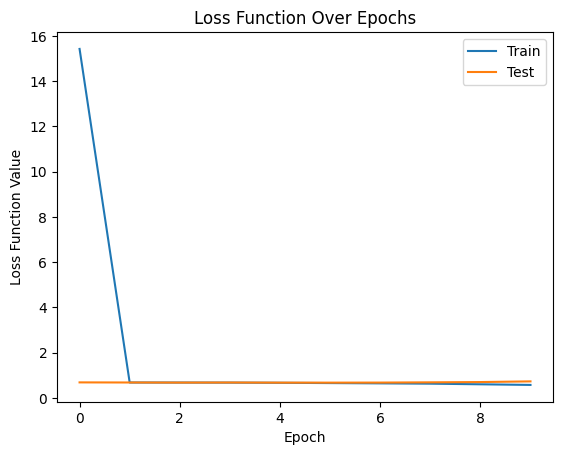

In [ ]:
plt.plot(base.history['loss'], label = 'Train')
plt.plot(base.history['val_loss'], label = 'Test')
plt.title('Loss Function Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss Function Value')
plt.legend();

In [ ]:
# CNN model with Regression

In [91]:
# instantiates an early stop
es = EarlyStopping(patience = 5)

# instantiates sequential baseline model
model_1 = Sequential()


# make a convolutional layer with 16 filters and MaxPool the results
model_1.add(Conv2D(16, kernel_size = (3, 3),
                   activation='relu',
                   input_shape=(128, 128, 3), kernel_regularizer = l2(0.01)))
model_1.add(MaxPooling2D(2))

# adds a dropout layer
model_1.add(Dropout(0.1))

# adds another conv2D layer
model_1.add(Conv2D(64, kernel_size = (3, 3),
                   activation='relu', kernel_regularizer = l2(0.01)))
model_1.add(MaxPooling2D(2))

# adds a dropout layer
model_1.add(Dropout(0.25))

# adds another conv2D layer
model_1.add(Conv2D(128, kernel_size = (3, 3),
                   activation='relu'))
model_1.add(MaxPooling2D(2))

# Finally, flatten the output and make a predictions.
model_1.add(Flatten())
model_1.add(Dense(1, activation='sigmoid'))

In [92]:
model_1.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [93]:
model_res_1 = model_1.fit(
    img_train,
    validation_data=(img_test),
    callbacks = [es],
    batch_size=64,
    epochs=20
)

Epoch 1/20
81/81 [==============================] - 89s 1s/step - loss: 7.7630 - acc: 0.5230 - val_loss: 0.9312 - val_acc: 0.5923
Epoch 2/20
81/81 [==============================] - 86s 1s/step - loss: 0.9219 - acc: 0.5552 - val_loss: 0.9083 - val_acc: 0.5854
Epoch 3/20
81/81 [==============================] - 84s 1s/step - loss: 0.9005 - acc: 0.5676 - val_loss: 0.8922 - val_acc: 0.5865
Epoch 4/20
81/81 [==============================] - 85s 1s/step - loss: 0.8867 - acc: 0.5672 - val_loss: 0.8826 - val_acc: 0.5900
Epoch 5/20
81/81 [==============================] - 85s 1s/step - loss: 0.8747 - acc: 0.5846 - val_loss: 0.8676 - val_acc: 0.5947
Epoch 6/20
81/81 [==============================] - 83s 1s/step - loss: 0.8630 - acc: 0.5939 - val_loss: 0.8674 - val_acc: 0.5679
Epoch 7/20
81/81 [==============================] - 84s 1s/step - loss: 0.8560 - acc: 0.5834 - val_loss: 0.8599 - val_acc: 0.5900
Epoch 8/20
81/81 [==============================] - 85s 1s/step - loss: 0.8459 - acc: 0.58

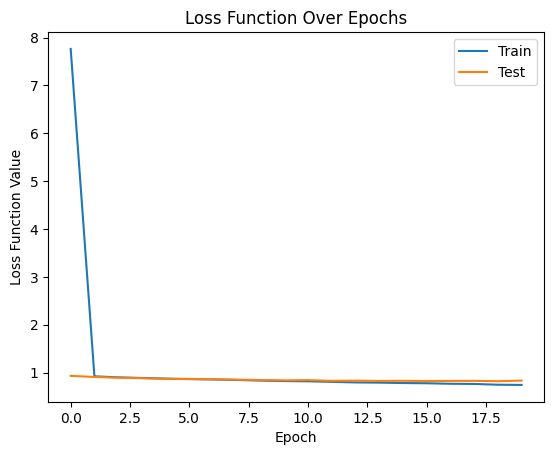

In [94]:
plt.plot(model_res_1.history['loss'], label = 'Train')
plt.plot(model_res_1.history['val_loss'], label = 'Test')
plt.title('Loss Function Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss Function Value')
plt.legend();

In [9]:
# VGG16 Model

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [2]:
img_size = [224, 224]

In [14]:
train_path = 'drive/MyDrive/spectrograms/train'
test_path = 'drive/MyDrive/spectrograms/test'

In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [4]:
for layer in base_model.layers:
    layer.trainable = False

In [10]:
model = Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    Dropout(0.1),
    layers.Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')  # Adjust the number of output classes as needed
])


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')


Found 0 images belonging to 0 classes.


In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs)


In [ ]:
history = model.fit(train, )